In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 손글씨 분류 모델 만들기

In [2]:
# 1. 데이터 로드

In [3]:
from sklearn import datasets

In [4]:
mnist = datasets.load_digits() # 8 * 8 이미지, 1797개

In [5]:
# 2. 데이터 전처리

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
print(len(mnist["data"]))

data = mnist["data"][0]
print(data)

# 원래의 행렬 데이터로 변환
img = data.reshape(8, 8)
img

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

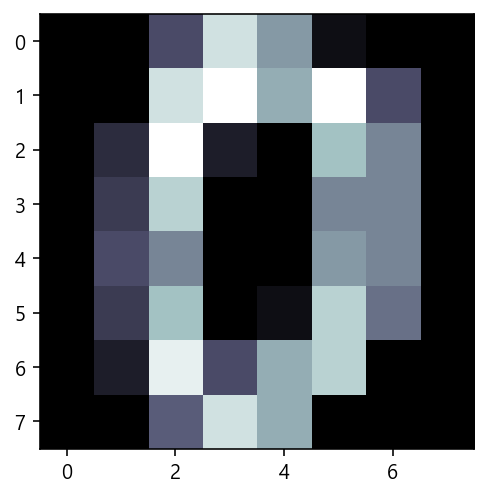

In [8]:
# 이미지 출력
plt.imshow(img, cmap=plt.cm.bone)
plt.show()

In [9]:
# mnist.data[1000:1002], mnist.target[1000:1002]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_x, test_x, train_y, test_y = train_test_split(
    mnist.data, mnist.target, test_size=0.3, random_state=0)

In [12]:
# 3. 모델 학습 : svm : linear, rbf

In [13]:
from sklearn.svm import SVC

In [14]:
linear_model = SVC( kernel="linear").fit(train_x, train_y)

In [15]:
rbf_model = SVC(kernel="rbf", C=10).fit(train_x, train_y)

In [16]:
# 4. 모델 평가

In [17]:
linear_score = linear_model.score(test_x, test_y)
rbf_score = rbf_model.score(test_x, test_y)
linear_score, rbf_score

(0.9740740740740741, 0.9925925925925926)

In [18]:
# c : 10 : 0.99259 > 과적합확인
# c : 1 : 0.99074
# c : 0.1 : 0.9481

In [19]:
# 5. 모델 사용

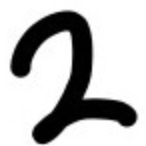

In [20]:
import PIL.Image as pil

sample_data = pil.open("data_1.png")
sample_data

In [21]:
# 이미지 사이즈를 8 * 8로 축소

In [22]:
data1 = sample_data.resize((8, 8))
data1

In [23]:
# 흑백 이미지로 변경

In [24]:
np.array(data1).shape

(8, 8, 4)

In [25]:
data2 = np.array(data1).mean(axis=2)
data2.shape

(8, 8)

In [26]:
# 흑백 전환 : 양각 > 음각

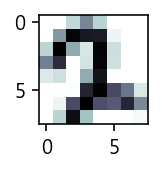

In [27]:
plt.figure(figsize=(2, 1))
plt.imshow(data2, cmap=plt.cm.bone)
plt.show()

In [28]:
data3 = np.ones(data2.shape) * 255 - data2
data3

array([[  0.  ,   0.  ,  30.75,  81.75,  35.25,   0.  ,   0.  ,   0.  ],
       [  0.  ,  70.5 , 171.  , 156.  , 153.75,   8.25,   0.  ,   0.  ],
       [ 33.75, 175.5 ,  61.5 ,  19.5 , 171.75,  25.5 ,   0.  ,   0.  ],
       [ 84.75, 141.  ,   0.  ,  22.5 , 171.  ,  24.75,   0.  ,   0.  ],
       [ 17.25,  24.75,   0.  ,  60.75, 159.75,   0.75,   0.  ,   0.  ],
       [  0.  ,   0.  ,   1.5 , 146.25, 172.5 , 117.75,  90.75,  18.75],
       [  0.  ,   8.25, 117.  , 175.5 , 113.25, 106.5 , 145.5 ,  79.5 ],
       [  0.  ,  34.5 , 164.25,  46.5 ,   0.  ,   0.  ,   0.75,   4.5 ]])

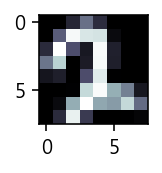

In [29]:
plt.figure(figsize=(2, 1))
plt.imshow(data3, cmap=plt.cm.bone)
plt.show()

In [30]:
# 색상범위 256 > 16

In [31]:
data4 = np.round(data3 / 16)
data4

array([[ 0.,  0.,  2.,  5.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 11., 10., 10.,  1.,  0.,  0.],
       [ 2., 11.,  4.,  1., 11.,  2.,  0.,  0.],
       [ 5.,  9.,  0.,  1., 11.,  2.,  0.,  0.],
       [ 1.,  2.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  7.,  6.,  1.],
       [ 0.,  1.,  7., 11.,  7.,  7.,  9.,  5.],
       [ 0.,  2., 10.,  3.,  0.,  0.,  0.,  0.]])

In [32]:
rbf_model.predict(data4.reshape(1, -1))

array([2])